# Natural Language Processing - - NLP _ Intro.

## Prog. Techniques to __Create_A_Model__ to Understand Language, Classify Content, generate and Create New Content in Human - Based - Language.

# How to model language (speech, text, documents)

## Obj.1. To decompose language into Numbers and How to use these numbers in Neural networks.

In [54]:
chr(65)

'A'

In [55]:
test_list = ['united', 'is', 'untied']
print("The original list : " + str(test_list))

The original list : ['united', 'is', 'untied']


In [56]:
res = [ord(ele) for sub in test_list for ele in sub]
print("The ascii list is : " + str(res))

The ascii list is : [117, 110, 105, 116, 101, 100, 105, 115, 117, 110, 116, 105, 101, 100]


# Antigram Words. Encoding each letter in the words. How about encoding the words themselves into numbers.

# [ I Love My Mom] and [ I Love My Baby] 
##  1     2      3        4                 1     2       3      5

### The two sentences are quite similar and share almost the same numerical structure.

# This process is called TOKEN_I_ZATION

## TF and Keras its built into a libray called "preprocessing" which can be used as data preparation tool. 

### Tokenizer is an object in the above library to convert words into tokens. 

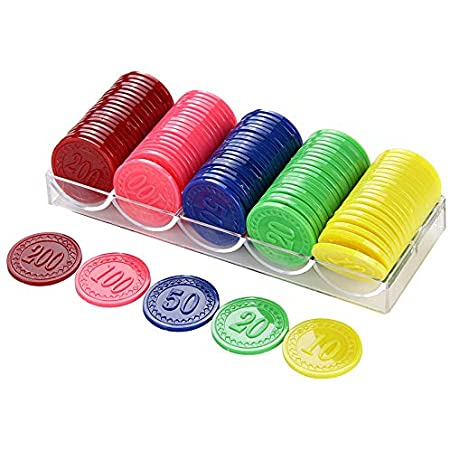

# Let's CODE....

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer 

In [58]:
Sentences = [
    'Today is a sunny day',
    'Today is a autum day',
    'what is it like today'
]

In [59]:
tokenizer = Tokenizer(num_words = 100)

# This class allows to vectorize a text corpus, by turning each text into either a sequence of integers 

## The Number of Words That it can Tokenize.

#### the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.
#f.keras.preprocessing.text.Tokenizer(num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token=None,
    document_count=0, **kwargs
)

In [60]:
tokenizer.fit_on_texts(Sentences)

# fit_on_texts will create a tokenized word index printing a set of KEY/Value pairs for the words.

In [61]:
word_index = tokenizer.word_index

In [62]:
print(word_index)

{'today': 1, 'is': 2, 'a': 3, 'day': 4, 'sunny': 5, 'autum': 6, 'what': 7, 'it': 8, 'like': 9}


In [63]:
sen = [
    'How are % today.',
    'I love $ money:'
]

In [64]:
tokenizer_1 = Tokenizer(num_words = 100, filters = '')
tokenizer_1.fit_on_texts(sen)
word_index_1 = tokenizer_1.word_index
print(word_index_1)

{'how': 1, 'are': 2, '%': 3, 'today.': 4, 'i': 5, 'love': 6, '$': 7, 'money:': 8}


In [65]:
tokenizer_1 = Tokenizer(num_words = 100, filters = '$%')
tokenizer_1.fit_on_texts(sen)
word_index_1 = tokenizer_1.word_index
print(word_index_1)

{'how': 1, 'are': 2, 'today.': 3, 'i': 4, 'love': 5, 'money:': 6}


# Filters remove all punctuations except ' Apostrophe.
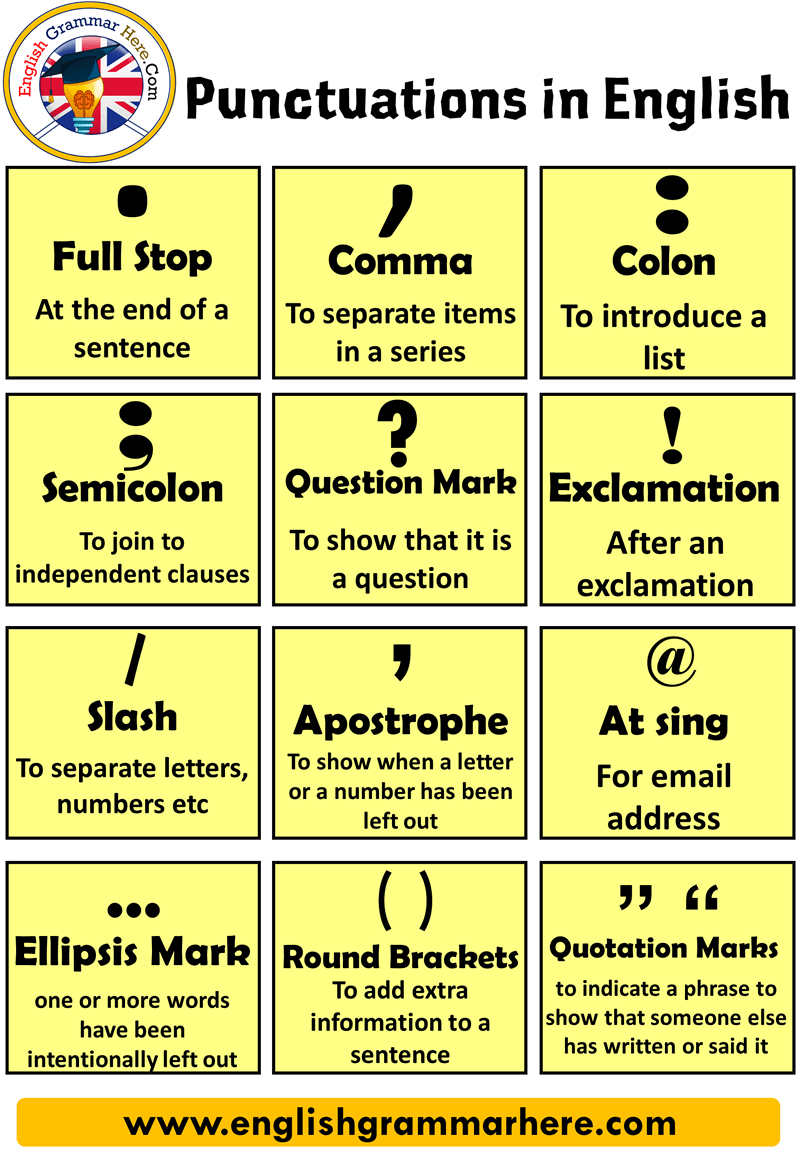

# Now lets Convert Sentences into Lists of Numbers ....With the number being the value where the word is the key

# Turning sentences into SEQUENCES.... Encode the sentences into sequence of Numbers

In [66]:
sequences = tokenizer.texts_to_sequences(Sentences)
print(sequences)

[[1, 2, 3, 5, 4], [1, 2, 3, 6, 4], [7, 2, 8, 9, 1]]


In [67]:
print(word_index)

{'today': 1, 'is': 2, 'a': 3, 'day': 4, 'sunny': 5, 'autum': 6, 'what': 7, 'it': 8, 'like': 9}


Sentences = [
    'Today is a sunny day',
    'Today is a autum day',
    'what is it like today'
]

# A glimpse of NLP dataset.
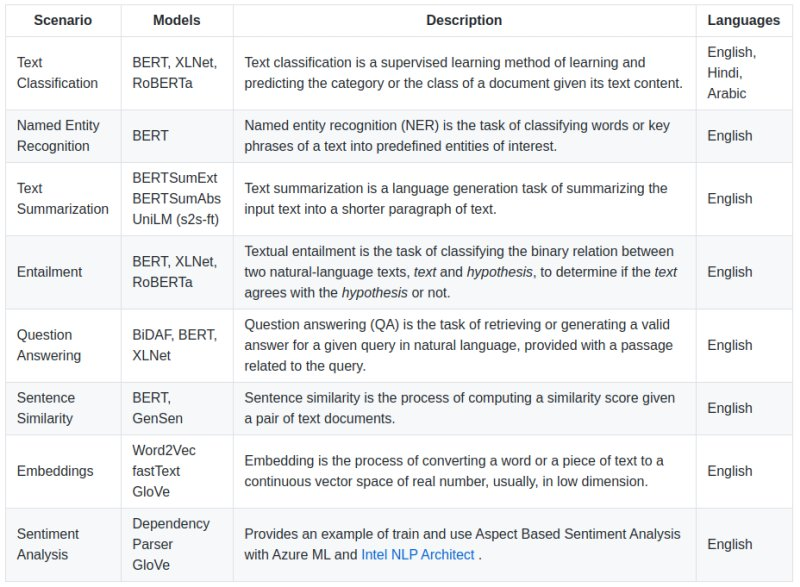

# The amount of training data is fixed, it can't cover 100% of your needs but is sufficient enough. 
## You will get 10000000 of words in your training data in many different contexts.. . .. .But we can't teach the ANN model, every possible word in every possibel context. 

## What happens when new text is shown to the trained ANN during testing phase.. . . . . ??? Its gets it all wrong.....predictions.

# What's the solution.

# oov : Out _of_Vacobulary token

In [68]:
test_data = [
    'Today is a snowy day',
    'will it rain tomorrow'
]

In [69]:
test_seque = tokenizer.texts_to_sequences(test_data)
word_ind = tokenizer.word_index

In [70]:
print(word_ind)

{'today': 1, 'is': 2, 'a': 3, 'day': 4, 'sunny': 5, 'autum': 6, 'what': 7, 'it': 8, 'like': 9}


In [71]:
print(test_seque)

[[1, 2, 3, 4], [8]]


# It pretty much lost the context all togethre. Use oov_token parameter in the tokenizer method

In [82]:
tokenizer = Tokenizer(num_words = 100, oov_token = "<snowy>")

In [83]:
tokenizer.fit_on_texts(Sentences)
word_index = tokenizer.word_index
sequen = tokenizer.texts_to_sequences(Sentences)
test_sequences = tokenizer.texts_to_sequences(test_data)
print(word_index)
print(test_sequences)

{'<Kuka>': 1, 'today': 2, 'is': 3, 'a': 4, 'day': 5, 'sunny': 6, 'autum': 7, 'what': 8, 'it': 9, 'like': 10}
[[2, 3, 4, 1, 5], [1, 9, 1, 1]]


# " Today is a [snowy>] Day" - - Decoding the encoding

# Lacks the originality . . . . But better than the previous encoding.

# The Next(Problem) = Uniformity in Lists for training.
## ANNs take same data shape as input. The tokenized words are never in the same shape. The sentences form different length sequences.

## To Get them to the same size and Shape . . . . Use Padding

In [130]:
sentences = [
    'Today is a sunny day',
    'today is a Windy Day',
    'Is it sunny Today',
    'I really enjoyed walking in the snow today'
]

In [95]:
tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
word_index = tokenizer.word_index
print(word_index)
print(sequences)

{'today': 1, 'is': 2, 'a': 3, 'sunny': 4, 'day': 5, 'windy': 6, 'it': 7, 'i': 8, 'really': 9, 'enjoyed': 10, 'walking': 11, 'in': 12, 'the': 13, 'snow': 14}
[[1, 2, 3, 4, 5], [1, 2, 3, 6, 5], [2, 7, 4, 1], [8, 9, 10, 11, 12, 13, 14, 1]]


In [97]:
type(sequences)

list

In [109]:
len(sequences[0]),len(sequences[1]),len(sequences[2]),len(sequences[3])

(5, 5, 4, 8)

# Let's Make Them into a Same Shape Vectors

In [110]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [112]:
padded_seq = pad_sequences(sequences)
print(padded_seq)

[[ 0  0  0  1  2  3  4  5]
 [ 0  0  0  1  2  3  6  5]
 [ 0  0  0  0  2  7  4  1]
 [ 8  9 10 11 12 13 14  1]]


In [113]:
len(padded_seq[0]),len(padded_seq[1]),len(padded_seq[2]),len(padded_seq[3])

(8, 8, 8, 8)

In [114]:
padded_seq = pad_sequences(sequences, padding = 'post')
print(padded_seq)

[[ 1  2  3  4  5  0  0  0]
 [ 1  2  3  6  5  0  0  0]
 [ 2  7  4  1  0  0  0  0]
 [ 8  9 10 11 12 13 14  1]]


padded_seq = pad_sequences(sequences, padding = 'post', maxlen = 6)
print(padded_seq)

In [116]:
padded_seq = pad_sequences(sequences, padding = 'post', maxlen = 6, truncating = 'post')
print(padded_seq)

[[ 1  2  3  4  5  0]
 [ 1  2  3  6  5  0]
 [ 2  7  4  1  0  0]
 [ 8  9 10 11 12 13]]


# "ragged" tensor can be used in TF to train the networks with variable length sequences for NLP.

# Removing STOP words and CLEANING Text

# Stopwords * Means
### Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc

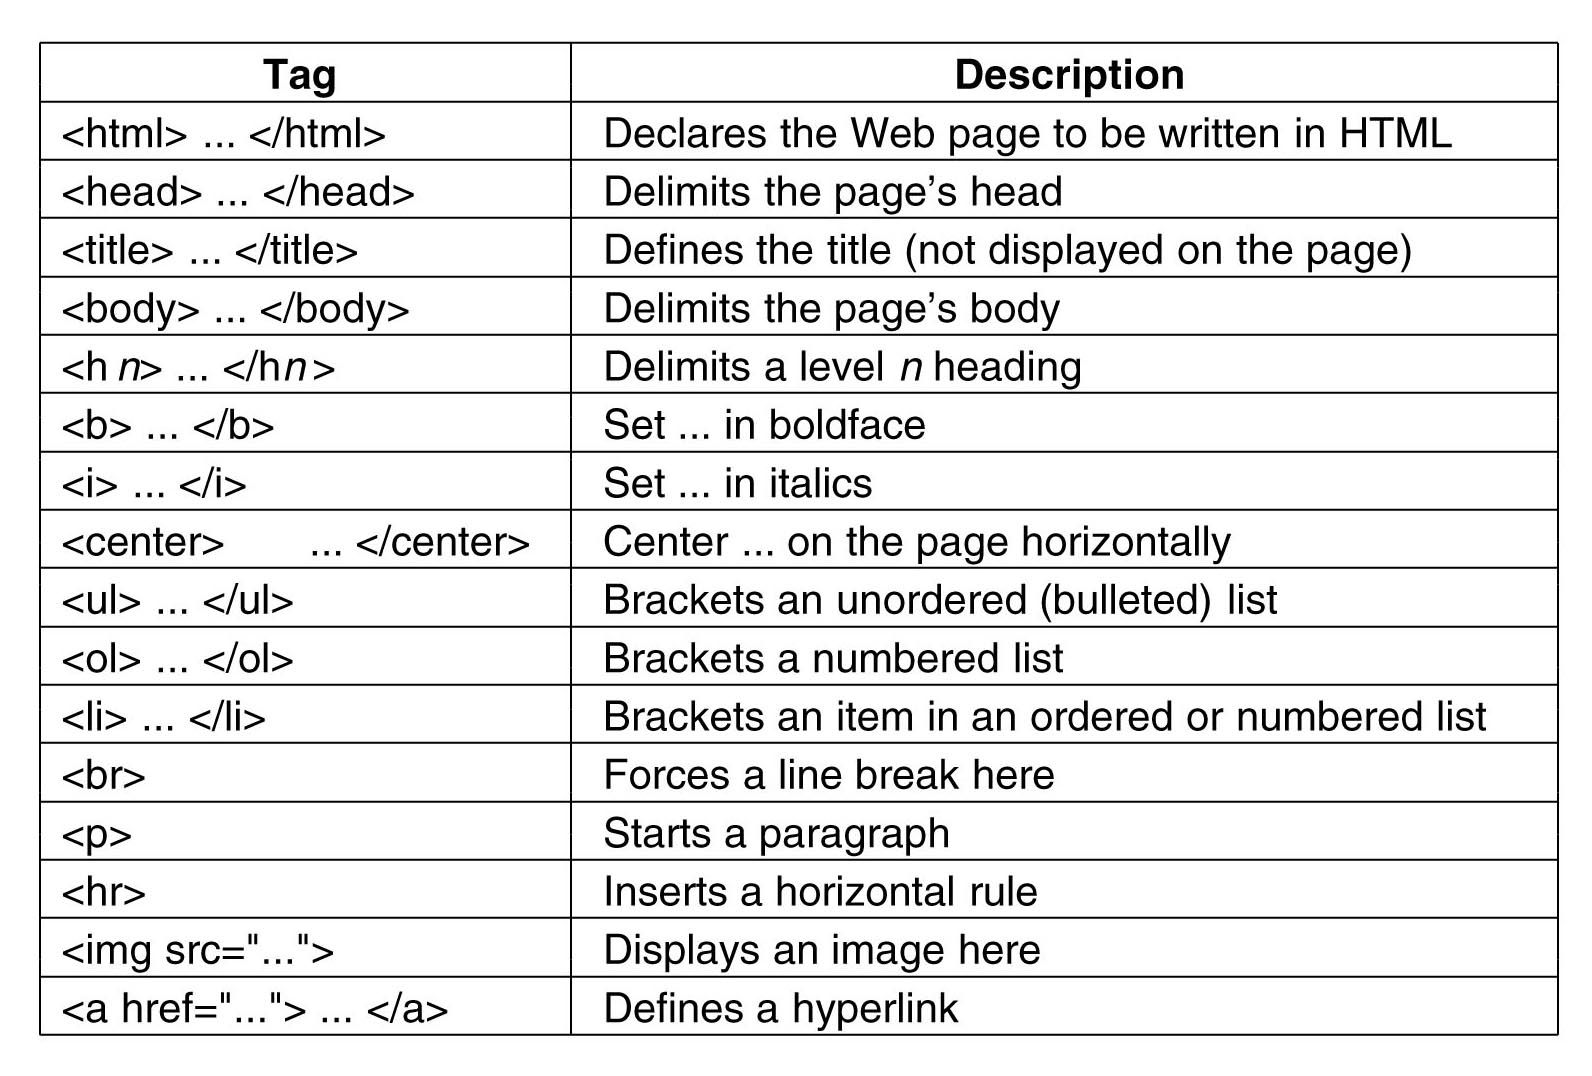

# Remove the above html tags that dosent contribute in the recogntion process. . . . .... .. . .. is Data Cleaning Process

In [128]:
from bs4 import BeautifulSoup
soup = BeautifulSoup('this is a <br> good language <p> for learning')
sentences = soup.get_text()

In [129]:
sentences

'this is a  good language  for learning'

In [131]:
stopwords = ["a","the","have","had","about","yourself","yours","above"]

In [132]:
import nltk
from nltk.corpus import stopwords

In [144]:
print(stopwords.words('english')) # spanish, turkish, russian

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# If these words are encountered ...... How to remove them using code

In [199]:
sentence = 'please guys, i hate to tell you so many times that this is my life'
words = sentence.split()
stop_words = set(stopwords.words("english"))
type(words)
filtered_sentence = ""
for word in words:
    if word not in stop_words:
        filtered_sentence = filtered_sentence + word + ""
sentences.append(filtered_sentence)

In [200]:
print(sentences)

['Today is a sunny day', 'today is a Windy Day', 'Is it sunny Today', 'I really enjoyed walking in the snow today', 'pleaseguys,hatetellmanytimeslife']


In [182]:
sentences = [
    'Today is a sunny day',
    'today is a Windy Day',
    'Is it sunny Today',
    'I really enjoyed walking in the snow today'
]

In [188]:
sentences[3].split()

['I', 'really', 'enjoyed', 'walking', 'in', 'the', 'snow', 'today']